### PSATJIRA

In [1]:
from data_import import *
from data_analysis import *
from prediction import *
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

### Importing data

In [2]:
ts_dict = import_precipitation_ts()
plants = get_plants()
plant_on_analysis = "PSATJIRA"

### Data Analysis


In [3]:
#precipitation_plots(ts_dict, plant_on_analysis)

In [4]:
#is_stationary(ts_dict, "PSATJIRA")

### Models

In [5]:
knn = KNeighborsRegressor(n_neighbors=10)
rf = RandomForestRegressor(n_estimators=20, max_depth=4, criterion="squared_error", random_state=0)

### Preparing Data for Prediction

In [6]:
df = ts_dict[plant_on_analysis].dropna(axis=0)

### Prediction without cfs and gefs

In [7]:
X_train, X_test, y_train, y_test = split_train_test_by_size(df, 100)

Evaluation 0:
Train size: 778
Val size: 777
RMSE val: 5.80861073278849
RMSE train: 4.638285682597572

Evaluation 1:
Train size: 1555
Val size: 777
RMSE val: 5.259864461409065
RMSE train: 4.9060659398039626

Evaluation 2:
Train size: 2332
Val size: 777
RMSE val: 5.536015446521293
RMSE train: 4.820937486553984

Evaluation 3:
Train size: 3109
Val size: 777
RMSE val: 5.679687114448207
RMSE train: 4.836259430503392

Evaluation 4:
Train size: 3886
Val size: 777
RMSE val: 5.481441479997649
RMSE train: 4.899055467893561

Evaluation 5:
Train size: 4663
Val size: 777
RMSE val: 6.022768287899072
RMSE train: 4.940056441727289

Evaluation 6:
Train size: 5440
Val size: 777
RMSE val: 5.6806049787456665
RMSE train: 5.014062300193889

Evaluation 7:
Train size: 6217
Val size: 777
RMSE val: 5.560808089261651
RMSE train: 5.018520739489118

Evaluation 8:
Train size: 6994
Val size: 777
RMSE val: 5.6569010140600815
RMSE train: 5.016257228260945

Evaluation 9:
Train size: 7771
Val size: 777
RMSE val: 5.510481

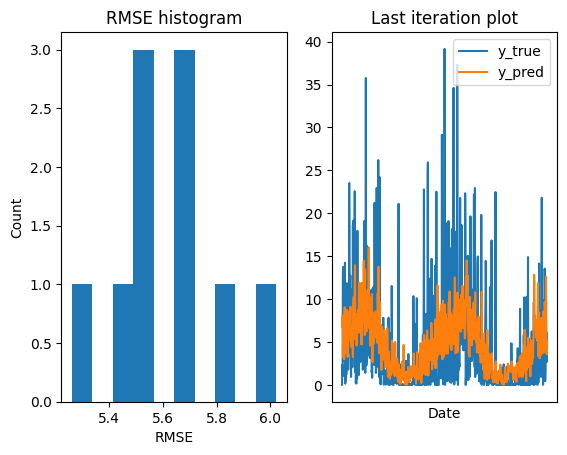

In [8]:
cross_validation(knn, X_train, y_train)

Evaluation 0:
Train size: 778
Val size: 777
RMSE val: 5.426100246870489
RMSE train: 4.497066111382357

Evaluation 1:
Train size: 1555
Val size: 777
RMSE val: 5.058955288486422
RMSE train: 4.804925947745341

Evaluation 2:
Train size: 2332
Val size: 777
RMSE val: 5.280960470937041
RMSE train: 4.8965286355320545

Evaluation 3:
Train size: 3109
Val size: 777
RMSE val: 5.438287949753936
RMSE train: 4.958797881750105

Evaluation 4:
Train size: 3886
Val size: 777
RMSE val: 5.163727806993798
RMSE train: 5.044078169175039

Evaluation 5:
Train size: 4663
Val size: 777
RMSE val: 5.627899182281759
RMSE train: 5.081831161815185

Evaluation 6:
Train size: 5440
Val size: 777
RMSE val: 5.18522276099668
RMSE train: 5.133548700370825

Evaluation 7:
Train size: 6217
Val size: 777
RMSE val: 5.1380911207183235
RMSE train: 5.142843704582623

Evaluation 8:
Train size: 6994
Val size: 777
RMSE val: 5.3797590969161
RMSE train: 5.1387502178198705

Evaluation 9:
Train size: 7771
Val size: 777
RMSE val: 5.11632260

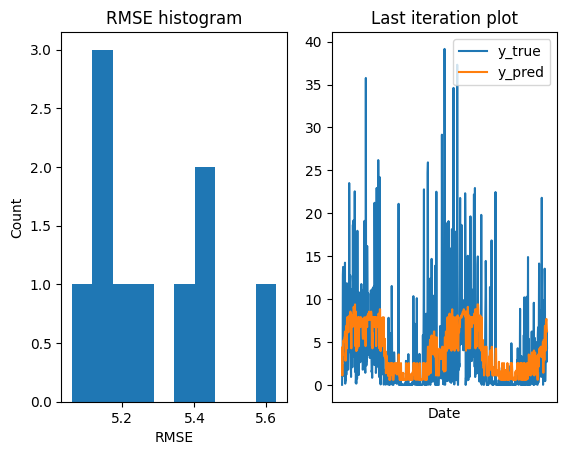

In [9]:
cross_validation(rf, X_train, y_train)

### Prediction with cfs and gefs

In [10]:
dfcg = df.copy()
c = pd.read_csv("../data/ts-PSATJIRA-cfs-model.csv", index_col=[0])
g = pd.read_csv("../data/ts-PSATJIRA-gefs-model.csv", index_col=[0])
dfcg = pd.concat([dfcg, c], axis=1).dropna(axis=0)
dfcg = pd.concat([dfcg, g], axis=1).dropna(axis=0)
X_traincg, X_testcg, y_traincg, y_testcg = split_train_test_by_size(dfcg)

Evaluation 0:
Train size: 51
Val size: 43
RMSE val: 7.82410342588811
RMSE train: 5.657738042123895

Evaluation 1:
Train size: 94
Val size: 43
RMSE val: 4.248335155897253
RMSE train: 6.123922551469366

Evaluation 2:
Train size: 137
Val size: 43
RMSE val: 4.937517215252208
RMSE train: 5.404943510467973

Evaluation 3:
Train size: 180
Val size: 43
RMSE val: 4.18819175014825
RMSE train: 5.270760178013071

Evaluation 4:
Train size: 223
Val size: 43
RMSE val: 3.4376808314084633
RMSE train: 4.989017117003022

Evaluation 5:
Train size: 266
Val size: 43
RMSE val: 1.1557623738103537
RMSE train: 4.689847725458561

Evaluation 6:
Train size: 309
Val size: 43
RMSE val: 2.224286829124826
RMSE train: 4.39794932780401

Evaluation 7:
Train size: 352
Val size: 43
RMSE val: 3.1954155898658074
RMSE train: 4.139131430269627

Evaluation 8:
Train size: 395
Val size: 43
RMSE val: 5.1195933643121005
RMSE train: 4.077623226794458

Evaluation 9:
Train size: 438
Val size: 43
RMSE val: 4.284976176276672
RMSE train: 

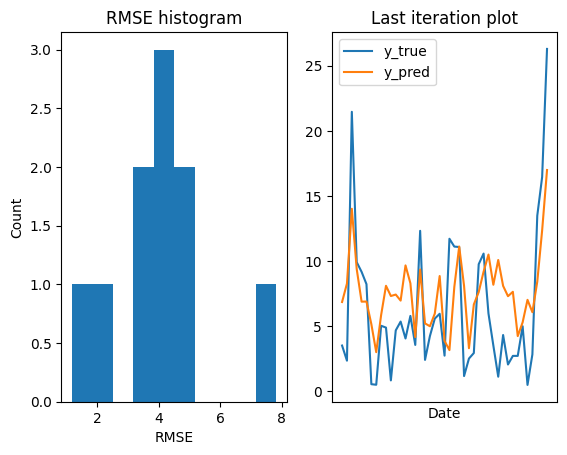

In [11]:
cross_validation(knn, X_traincg, y_traincg)

Evaluation 0:
Train size: 51
Val size: 43
RMSE val: 6.661902255459564
RMSE train: 2.5347216206314824

Evaluation 1:
Train size: 94
Val size: 43
RMSE val: 4.8425981784425405
RMSE train: 2.9322868747757194

Evaluation 2:
Train size: 137
Val size: 43
RMSE val: 4.509945097929039
RMSE train: 2.5783609792840956

Evaluation 3:
Train size: 180
Val size: 43
RMSE val: 2.578043894916784
RMSE train: 2.7871355650860483

Evaluation 4:
Train size: 223
Val size: 43
RMSE val: 2.3029713311040405
RMSE train: 2.6993491559351357

Evaluation 5:
Train size: 266
Val size: 43
RMSE val: 2.6123004913380856
RMSE train: 2.5096625588659274

Evaluation 6:
Train size: 309
Val size: 43
RMSE val: 2.0624626867907074
RMSE train: 2.461121100450348

Evaluation 7:
Train size: 352
Val size: 43
RMSE val: 3.3600935561470404
RMSE train: 2.3194497577165936

Evaluation 8:
Train size: 395
Val size: 43
RMSE val: 3.6114992322452033
RMSE train: 2.43416320424703

Evaluation 9:
Train size: 438
Val size: 43
RMSE val: 4.063054187636171
R

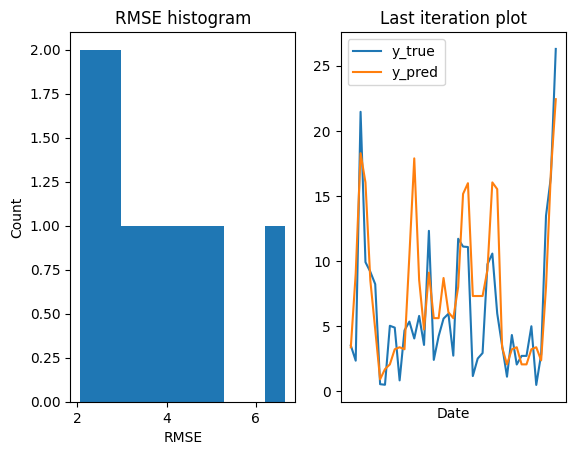

In [12]:
cross_validation(rf, X_traincg, y_traincg)

### Test scores

#### Without cfs and gefs

In [13]:
test(knn, X_train, X_test, y_train, y_test)

Test RMSE: 5.839918661912107


In [14]:
test(rf, X_train, X_test, y_train, y_test)

Test RMSE: 5.585601960078757


#### With cfs and gefs

In [15]:
test(knn, X_traincg, X_testcg, y_traincg, y_testcg)

Test RMSE: 5.398014318866046


In [16]:
test(rf, X_traincg, X_testcg, y_traincg, y_testcg)

Test RMSE: 4.1999598910126705
